# Degree Distribution

KNN performance in case of User-Based model is not good, even if it would work. The main reason is that this movie dataset ratings are highly sparse. Specifically, even if we are aware of the K movies most similar to the movie **m**, the probability of user **u** having rated any of these movies is relatively small. So we are still not able to make good predictions.  
  
In this script we will examine whether this movie dataset follows a *Power Law distribution* (PLD). A Power Law Distribution is a functional relationship between 2 quantities, where a relative change of one quantity results in a proportional relative change in the other quantity, independent of the initial size of these quantities: one quantity varies as a power of another.
  
Why do we need to see if our datasets follows PLD? Because it would be easier to see and explain why similarity based model can result woerse performance on data.

### Load dependencies

In [1]:
# load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [9]:
data_dir = '../data/'

In [10]:
# users file
user_columns = ['user_id', 'age', 'sex', 'zip_code']
users = pd.read_csv(data_dir + 'Person.txt', sep='\t', names=user_columns, encoding='latin-1')

In [11]:
# ratings file
vote_columns = ['user_id', 'movie_id', 'rating1', 'rating2', 'unix_timestamp']
votes = pd.read_csv(data_dir + 'Vote.txt', sep='\t', names=vote_columns, encoding='latin-1')

In [12]:
# movies file
movie_columns = ['movie_id', 'movie_title', 'site_link', 'IMDb_URL', 'release_date', 'release_date_relative', 'video_release_date', 'video_release_date_relative', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy']
movies = pd.read_csv(data_dir + 'Movie.txt', sep='\t', names=movie_columns, encoding='latin-1')

In [13]:
# merge users, movies, and votes data
movie_ratings = pd.merge(movies, votes)
merged_table = pd.merge(movie_ratings, users)

We need the following dictionaries for the same reason as in the previous scripts.

In [14]:
user_indices = {user.user_id: user.Index for user in users.itertuples()}
movie_indices = {movie.movie_id: movie.Index for movie in movies.itertuples()}
movie_by_index = {movie.Index: movie for movie in movies.itertuples()}

### Prepare data and functions

Same as in Item-Based and User-Based KNN, we will create matrix that consists of a user ratings of movies - user-movie matrix.
The position of the rating is determined by user Id (as 0th axis) and movie Id (as 1st axis).

In [16]:
total_users = users.shape[0]
total_movies = movies.shape[0]
total_votes = votes.shape[0]

In [19]:
ratings_matrix = np.zeros((total_users, total_movies))
for row in votes.itertuples():
    ratings_matrix[user_indices[row.user_id], movie_indices[row.movie_id]] = row.rating1
print(ratings_matrix)

[[ 0.6  0.6  0.  ...,  0.   1.   0. ]
 [ 0.8  0.   0.  ...,  0.   0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]
 ..., 
 [ 0.8  0.   0.4 ...,  0.   0.   0. ]
 [ 0.   0.   0.  ...,  0.   0.   0. ]
 [ 0.8  0.   0.  ...,  0.   0.   0. ]]


## Degree Distribution of User Rating Counts

Let's create a dictionary that will have a user as a key and all the ratings he/she gave to movies as a value (movies not rated by this user are not included in the value list in this dictionary).

In [83]:
review_count = {}
print(ratings_matrix.shape[0])
print(ratings_matrix.shape[1])
for user in range(ratings_matrix.shape[0]):
    review_count.update({user:ratings_matrix[user, :].nonzero()[0].shape[0]})

72916
1628


In [37]:
len(review_count)

72916

How many users haven't voted?

In [88]:
sum(1 for x in review_count.values() if x==0)

11839

What is the maximum number of reviews by one user (really crazy user)?

In [44]:
max(review_count.values())

1095

Now, we will create a dictionary that consists of following data:
  - keys represent number of votes N
  - values represent how many users voted N times in total.

In [49]:
degree_distribution = {}
for value in range(0, max(review_count.values())+1):
    degree_distribution.update({value:sum(1 for x in review_count.values() if x==value)}) 

Let's plot out User-Rating degree distribution.

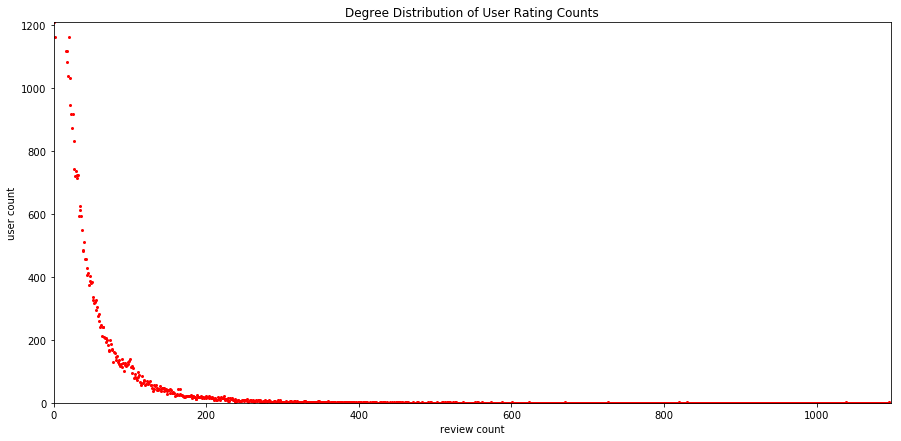

In [106]:
plt.figure(figsize=(15,7))
plt.title("Degree Distribution of User Rating Counts")
plt.ylabel('user count')
plt.xlabel('review count');
plt.plot(list(degree_distribution.keys()), list(degree_distribution.values()), 'ro', markersize=2)
plt.axis([0, max(review_count.values())+2, 0, sum(1 for x in review_count.values() if x==1)])
plt.show()

We can see linear scale plot of the distribution of number of ratings among users.  
One can observe that a few users get upward of 1200 reviews, whereas most users gave only a few ratings. The curve almost has L shape.

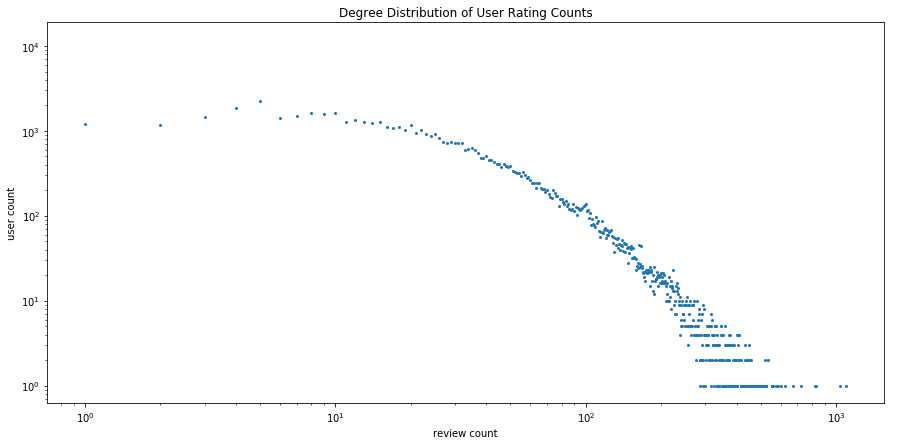

In [104]:
plt.figure(figsize=(15,7))
plt.title("Degree Distribution of User Rating Counts")
plt.ylabel('user count')
plt.xlabel('review count');
plt.loglog(list(degree_distribution.values()),'.',marker='o', markersize=2)
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')
plt.show()

Log-log scale plot of the distribution of ratings among users.  
This plot shows the same data represented a bit differently, on a log-log scale the same distribution shows itself to be almost exponential.  
With this information, similarity matrix solution is not the good one, and here we can see that result would be shown through worst performance on data.

## Degree Distribution of Movie Rating Counts

Let's do the sam with movies.  
  
Let's create a dictionary that will have a movie as a key and all the ratings it received as a value (0s as a movie rating is not included).

In [85]:
review_count_movies = {}
for movie in range(ratings_matrix.shape[1]):
    review_count_movies.update({movie:ratings_matrix[:, movie].nonzero()[0].shape[0]})

In [86]:
len(review_count_movies)

1628

How many movies without any vote?

In [89]:
sum(1 for x in review_count_movies.values() if x==0)

9

What is the maximum number of reviews for one movie?

In [91]:
max(review_count_movies.values())

31579

Now, we will create a dictionary that consists of following data:
  - keys represent number of votes movie received N
  - values represent how many movies received N number of votes in total.

In [93]:
degree_distribution_movie = {}
for value in range(0, max(review_count_movies.values())+1):
    degree_distribution_movie.update({value:sum(1 for x in review_count_movies.values() if x==value)}) 

Let's plot out Movie-Rating degree distribution.

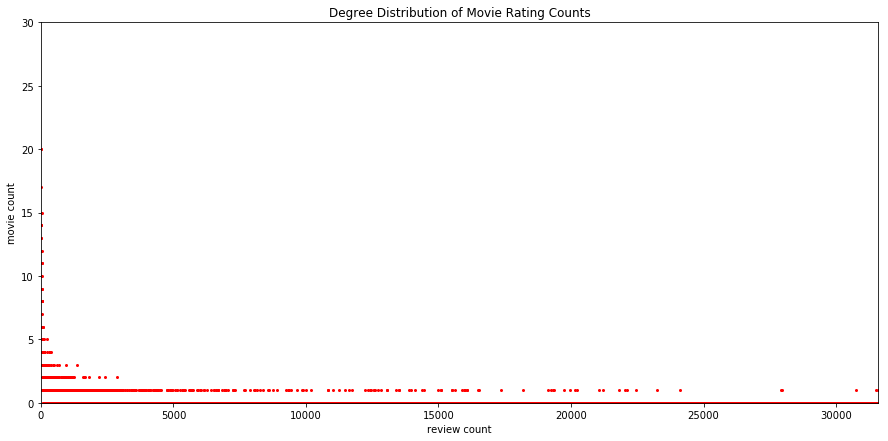

In [107]:
plt.figure(figsize=(15,7))
plt.title("Degree Distribution of Movie Rating Counts")
plt.ylabel('movie count')
plt.xlabel('review count');
plt.plot(list(degree_distribution_movie.keys()), list(degree_distribution_movie.values()), 'ro', markersize=2)
plt.axis([0, max(review_count_movies.values())+2, 0, sum(1 for x in review_count_movies.values() if x==1)])
plt.ylim([0,30])
plt.show()

We can see linear scale plot of the distribution of number of ratings among movies.  
One can observe that this plot is slightly more different from the above one. But after all, it tends to get L shape as well. Around 20 movies received a very small amount of ratings. Also really small amount of movies received huge number of ratings.

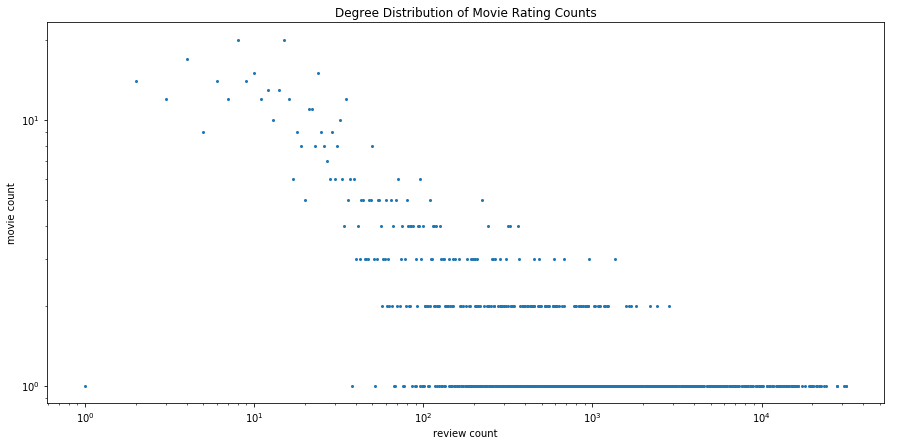

In [105]:
plt.figure(figsize=(15,7))
plt.title("Degree Distribution of Movie Rating Counts")
plt.ylabel('movie count')
plt.xlabel('review count');
plt.loglog(list(degree_distribution_movie.values()),'.',marker='o', markersize=2)
plt.axes([0.45,0.45,0.45,0.45])
plt.axis('off')
plt.show()

Log-log scale plot of the distribution of ratings among movies.  
This plot shows the same data represented a bit differently, on a log-log scale the same distribution shows itself to be almost exponential.  
Even if it seems to be more widespreaded than the above user's plot, it still follows an exponential pattern. 
However, maybe it won't be as bad as it is case with User-Based KNN. Still this proofs that the better similarity based models could be implemented.